In [3]:
import pathlib
import sys 
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from typing import List

In [4]:
sys.path.insert(0, '/srv/data/joeh97/github/SWP-2023-Automatic-Detection-of-Vibratory-Behavior-of-Honeybees' )

In [5]:
import config as cfg
from main import load_gt_items
from dataset import WDDDataset

In [6]:
# Load paths to all pickle files
gt_items = load_gt_items(cfg.PATH_PICKLE) 
def remap(p):
    head = pathlib.Path(cfg.PATH_IMAGES) # actual system path
    tail = p.relative_to("/mnt/curta/storage/beesbook/wdd/")  # path from pickle 
    return head.joinpath(tail) # replace path
gt_items = [tuple(item) + (remap(path),) for *item, path, in gt_items]

all_indices = np.arange(len(gt_items))
print(f"Found {len(all_indices)}  examples")
gt_items = [gt_items[i] for i in all_indices]

gt_items[:4]

Found 1009  examples


[(10902373867864485654,
  'activating',
  1.88699,
  PosixPath('/srv/data/joeh97/data/wdd_ground_truth/wdd_output_2021/cam1/2021/10/2/10/13/13/waggle.json')),
 (14315729783549168726,
  'other',
  1.74699,
  PosixPath('/srv/data/joeh97/data/wdd_ground_truth/wdd_output_2021/cam0/2021/10/3/11/6/2/waggle.json')),
 (15763256288124410364,
  'other',
  2.73699,
  PosixPath('/srv/data/joeh97/data/wdd_ground_truth/wdd_output_2021/cam1/2021/10/9/3/39/1/waggle.json')),
 (17556160191938921872,
  'trembling',
  0.09699,
  PosixPath('/srv/data/joeh97/data/wdd_ground_truth/wdd_output_2021/cam0/2021/10/2/9/44/1/waggle.json'))]

In [7]:
dataset = WDDDataset(gt_items=gt_items, img_resize_factor=0.5)
dataloader = DataLoader(dataset=dataset, batch_size=1)

In [12]:
video, label = next(iter(dataloader))

Images had shape (220, 220), now (1, 110, 110)
Images pixel range was [4,137], now [-1.0,0.7098039388656616]


In [13]:
def show(video:List[np.ndarray]):
    seq_len = len(video)

    fig, ax = plt.subplots(ncols=seq_len, nrows=1, figsize=(20,10))
    for i in range(seq_len):
        ax[i].imshow(video[i], interpolation='nearest', cmap='gray')

In [14]:
video = np.squeeze(video)

Show video

/tmp/ipykernel_757397/1493812583.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(ncols=seq_len, nrows=1, figsize=(20,10))


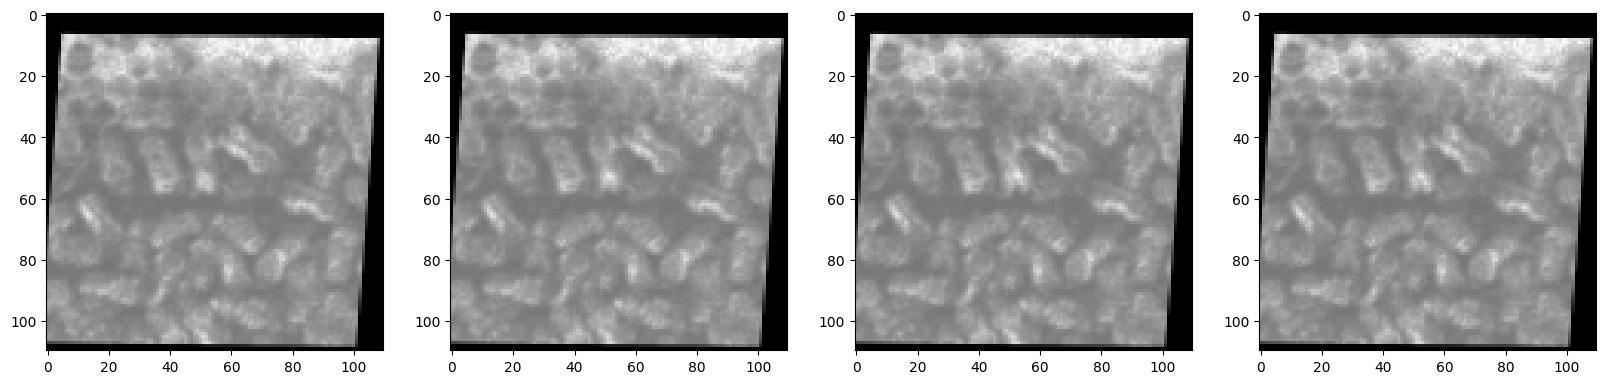

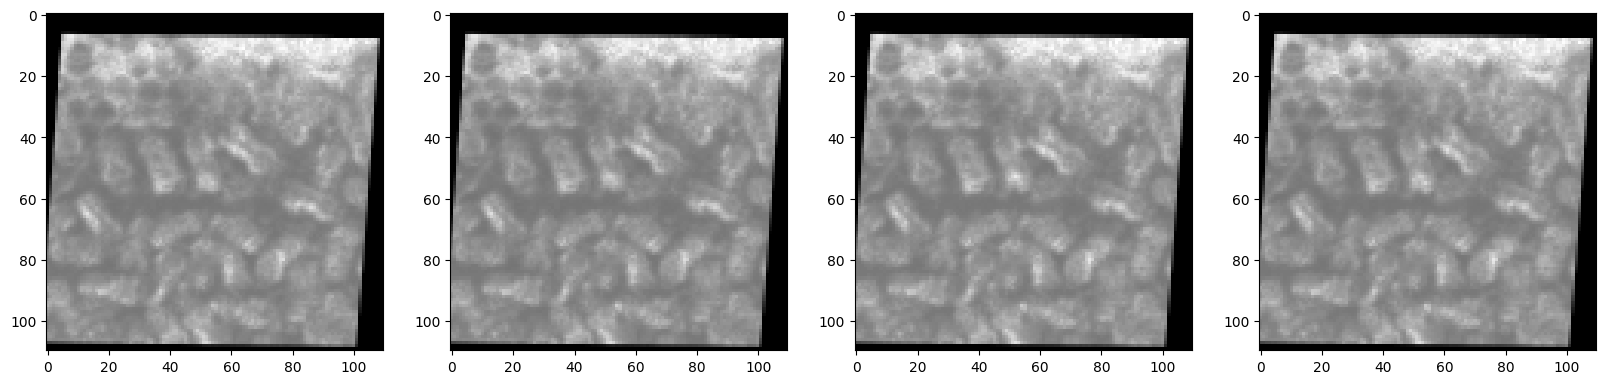

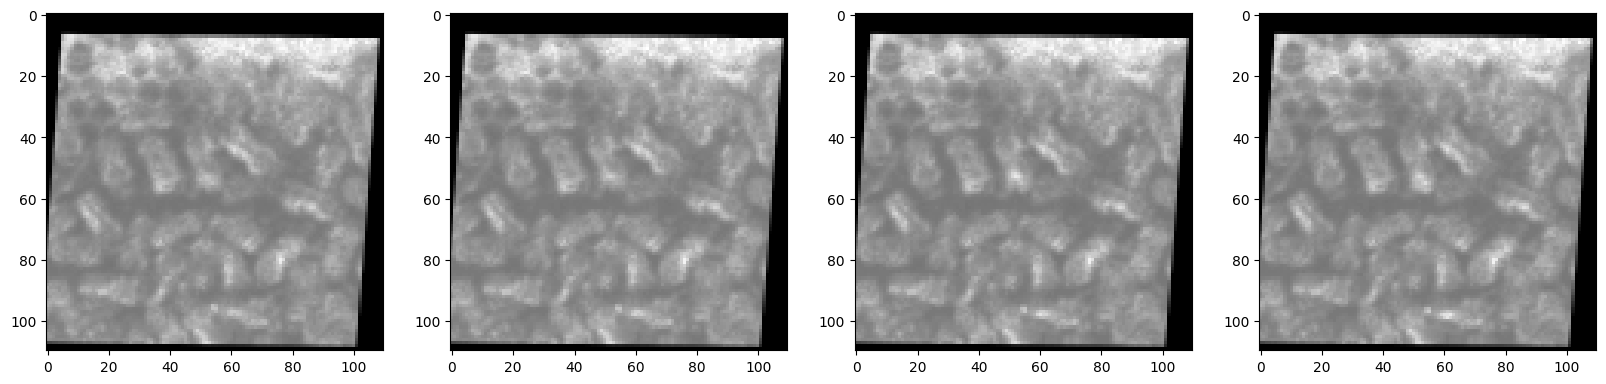

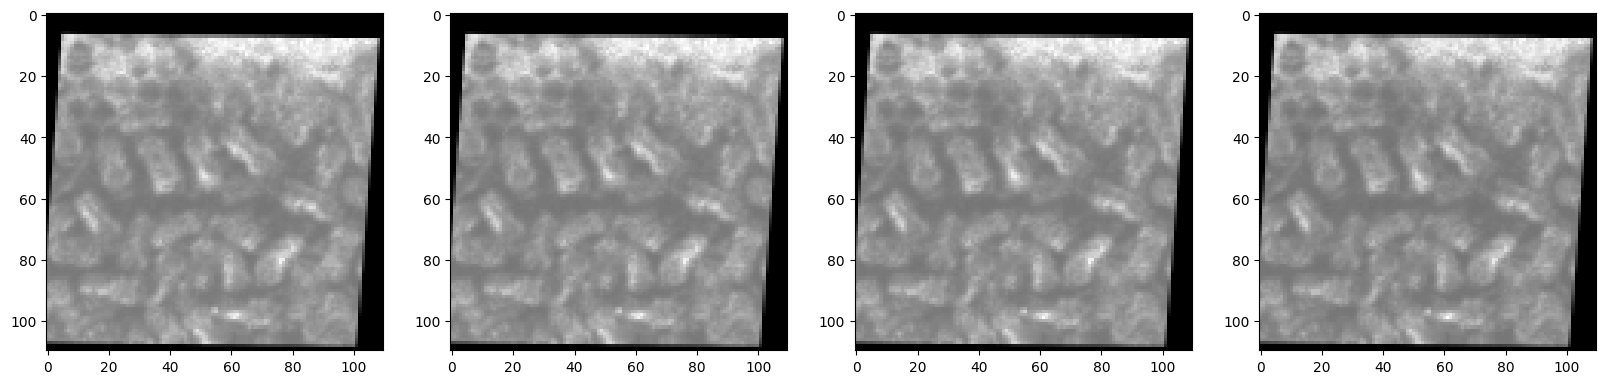

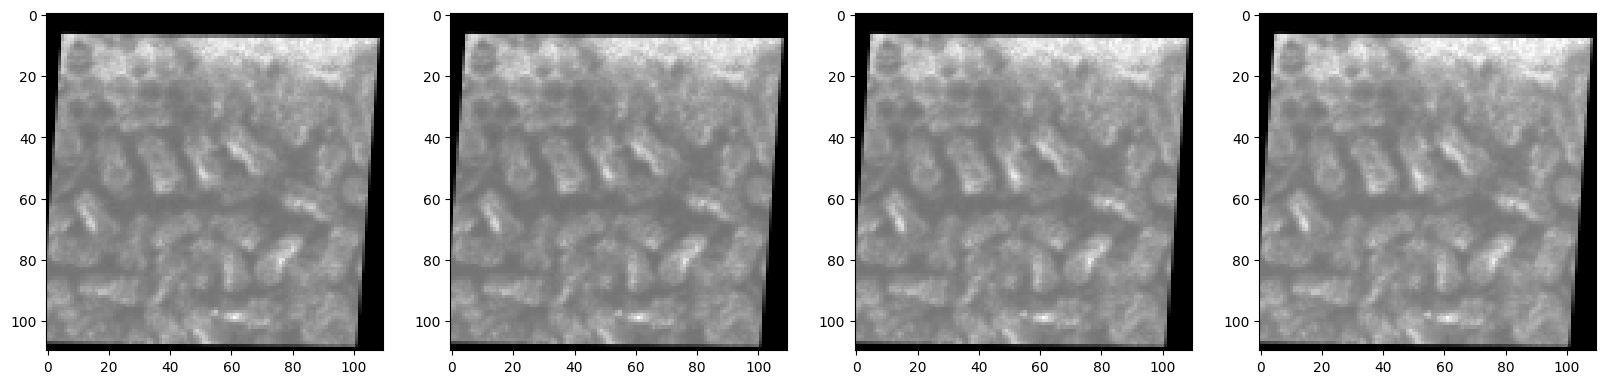

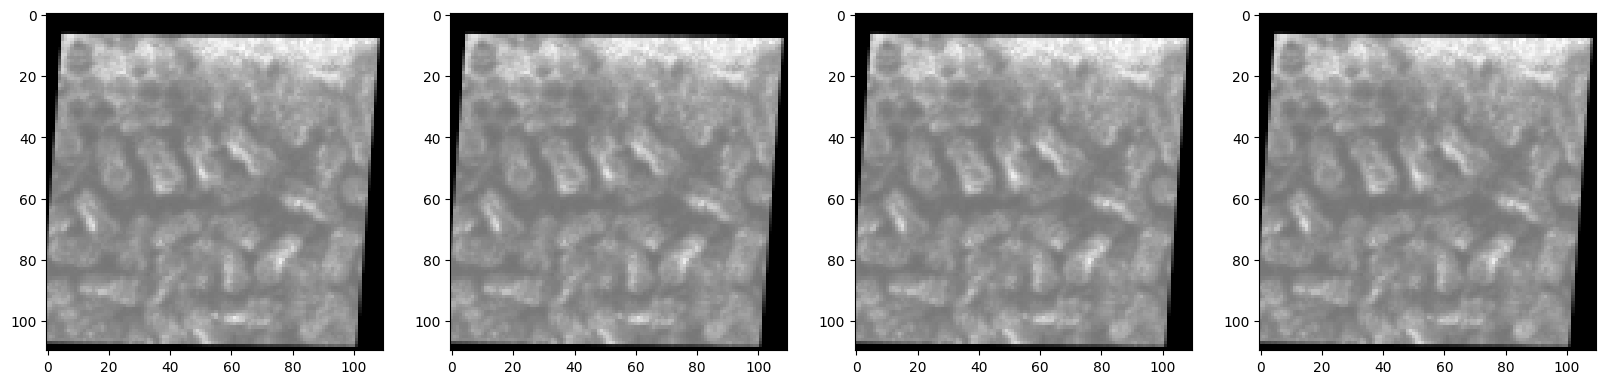

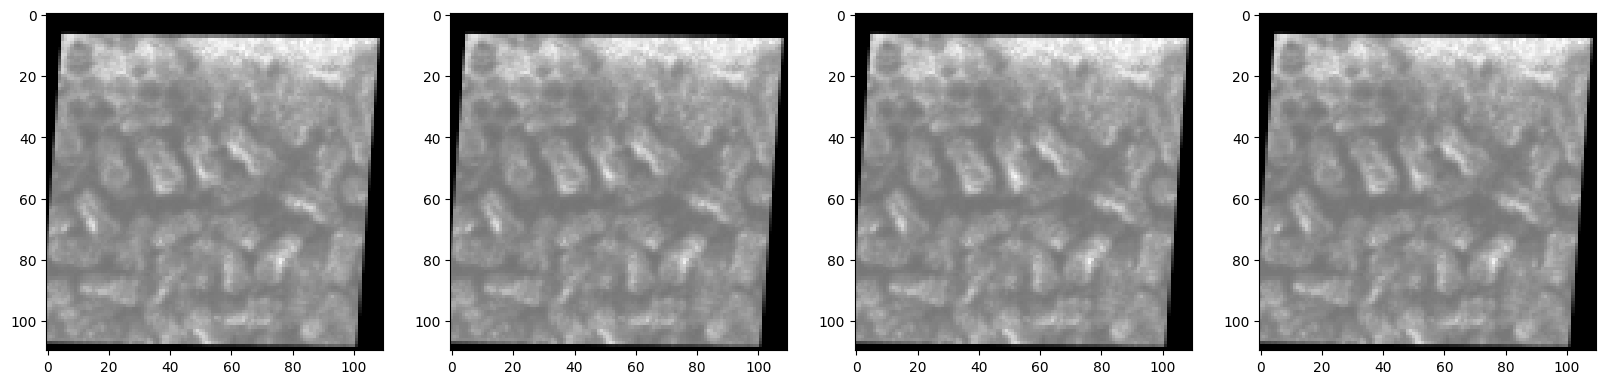

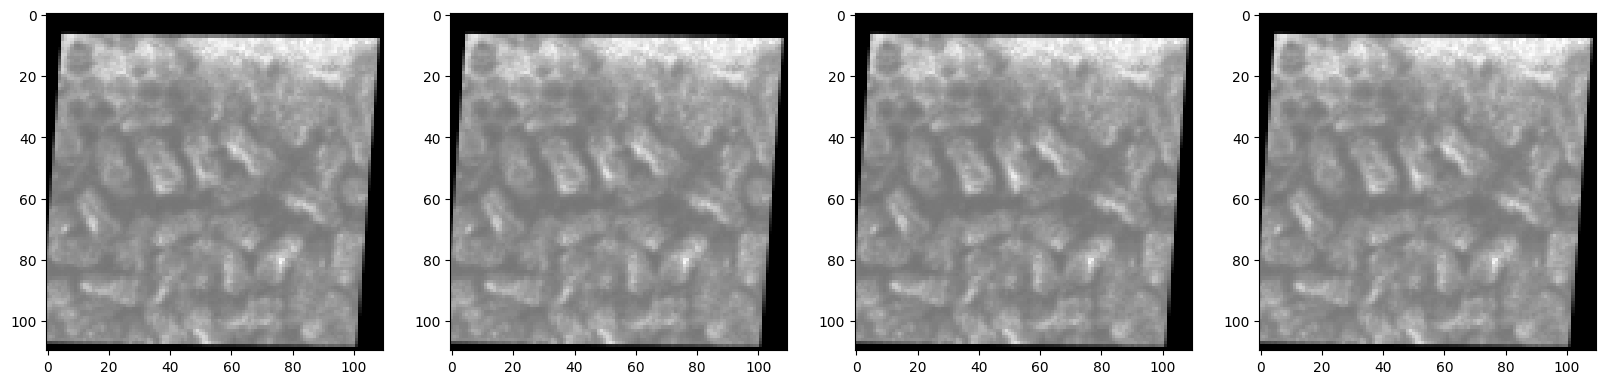

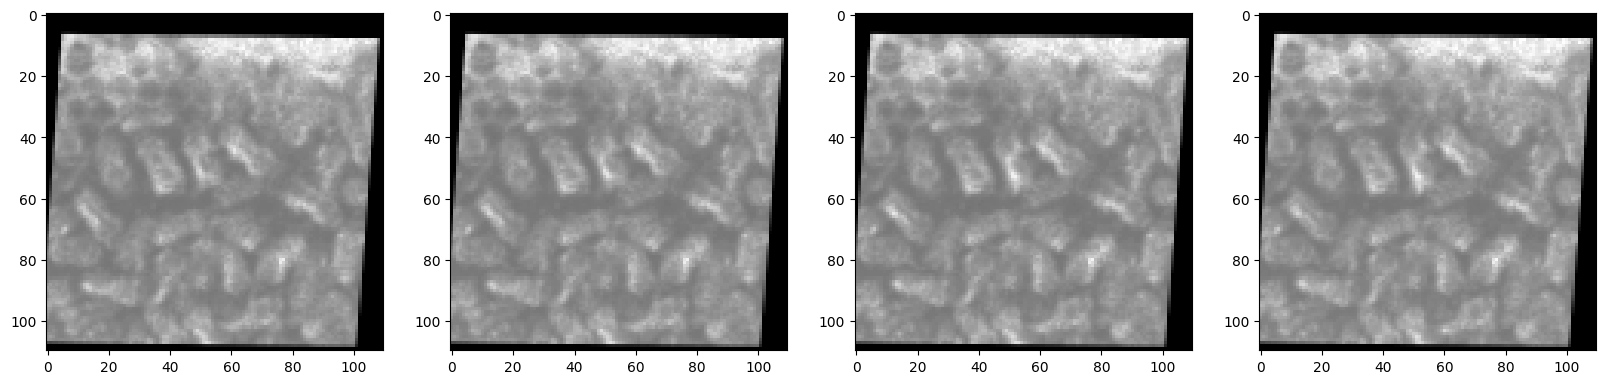

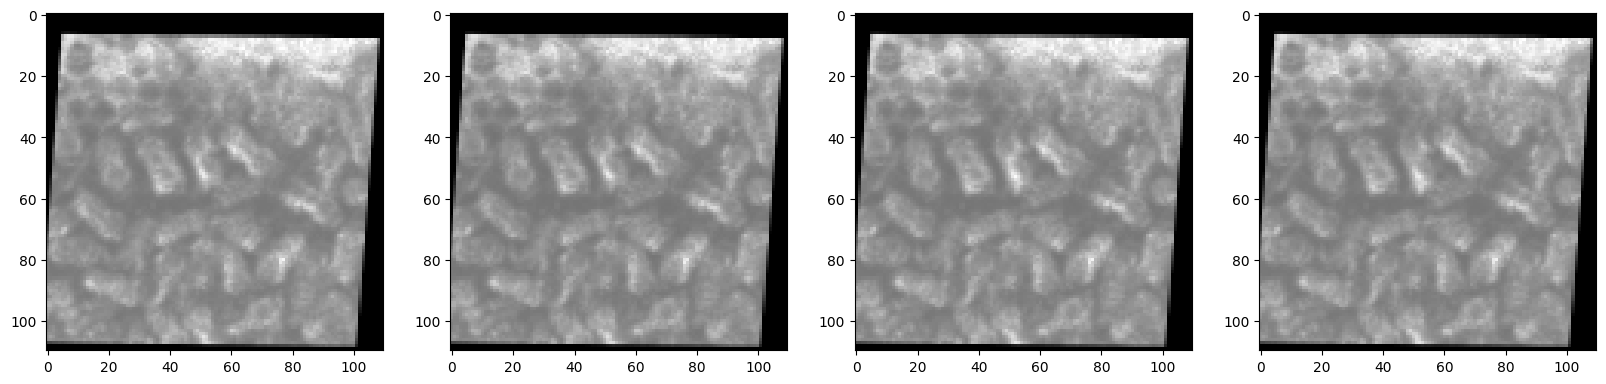

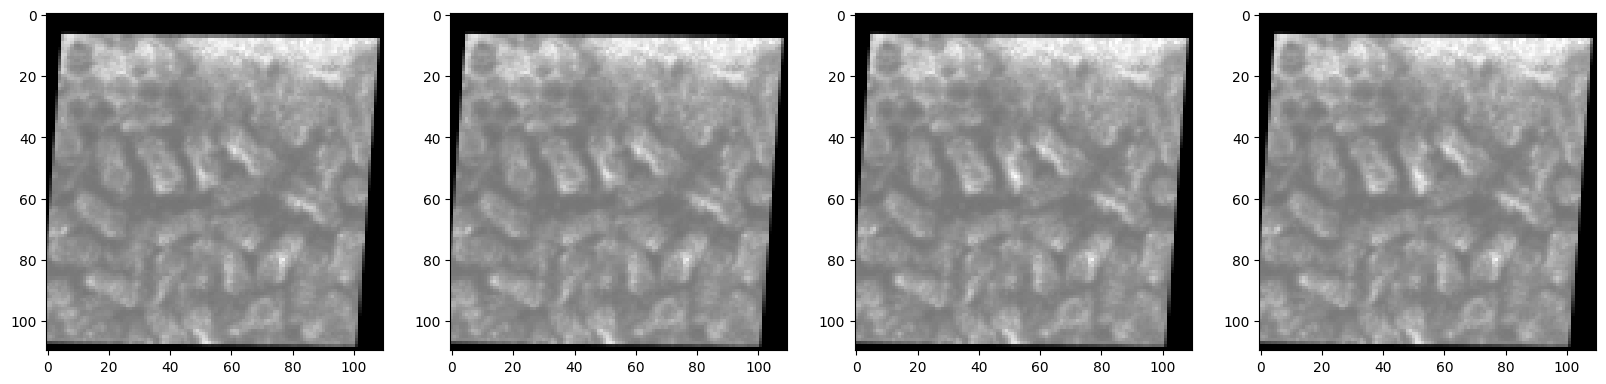

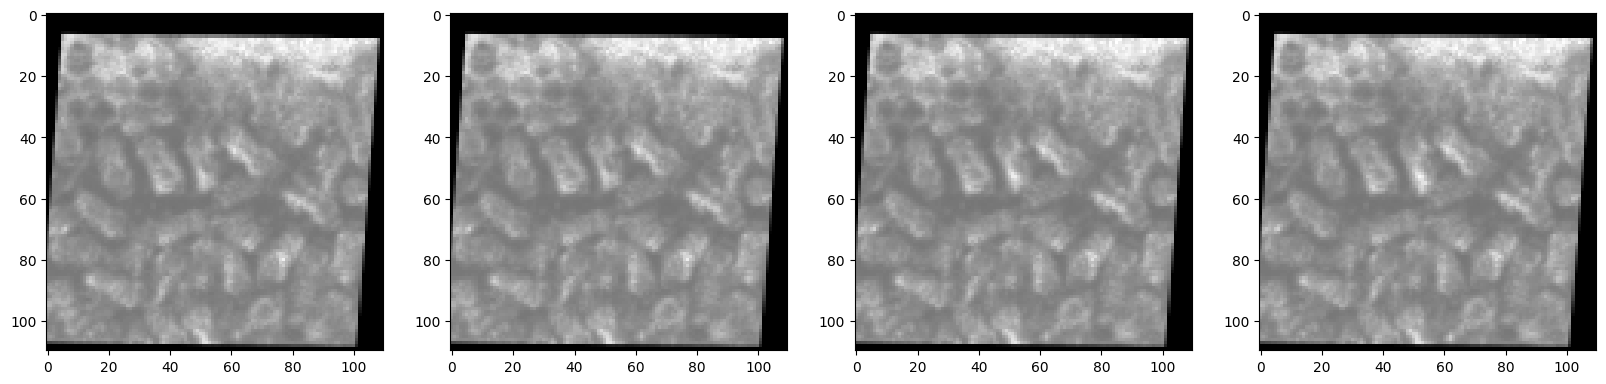

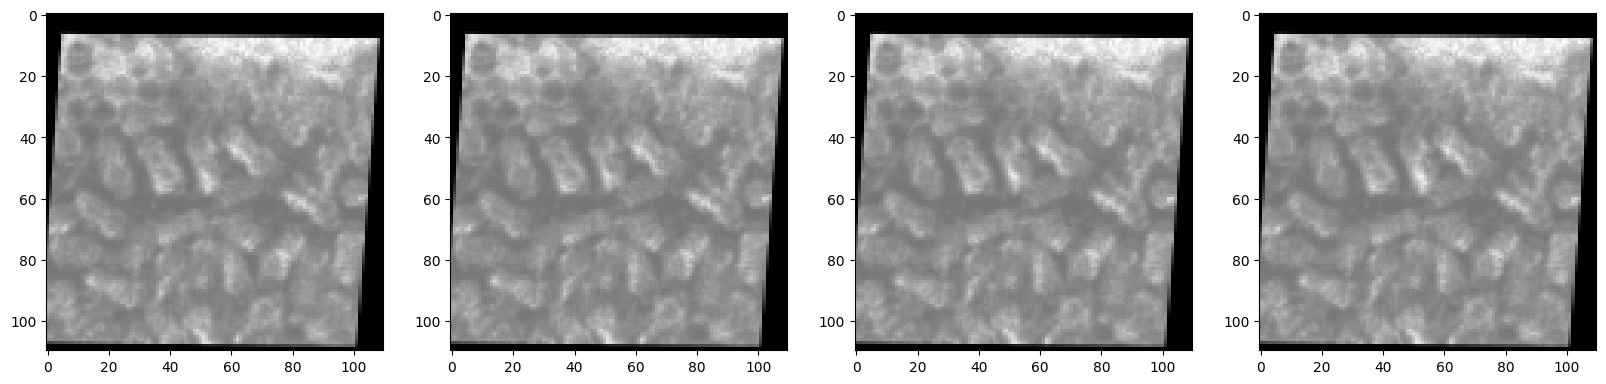

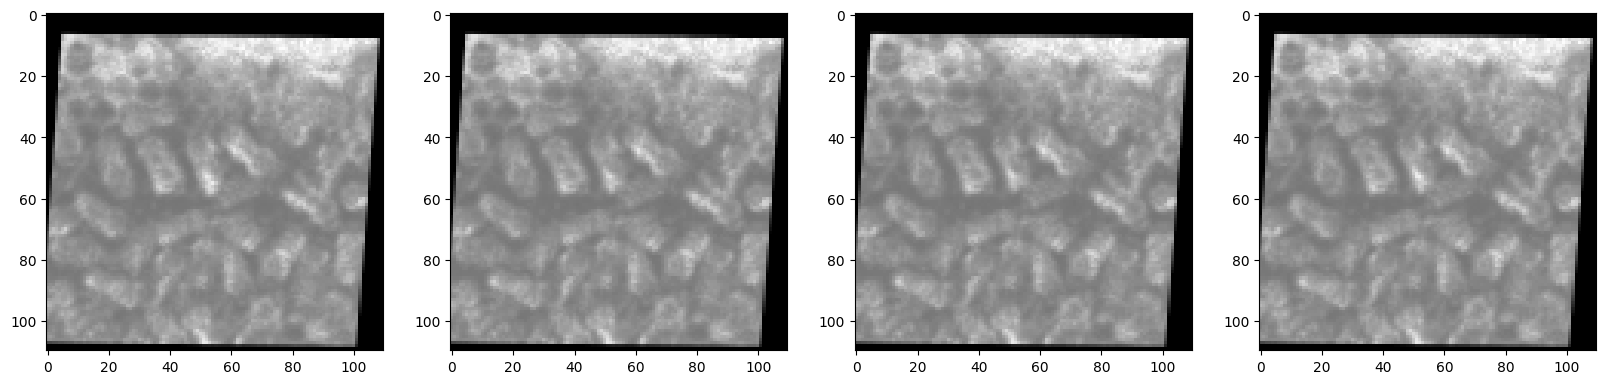

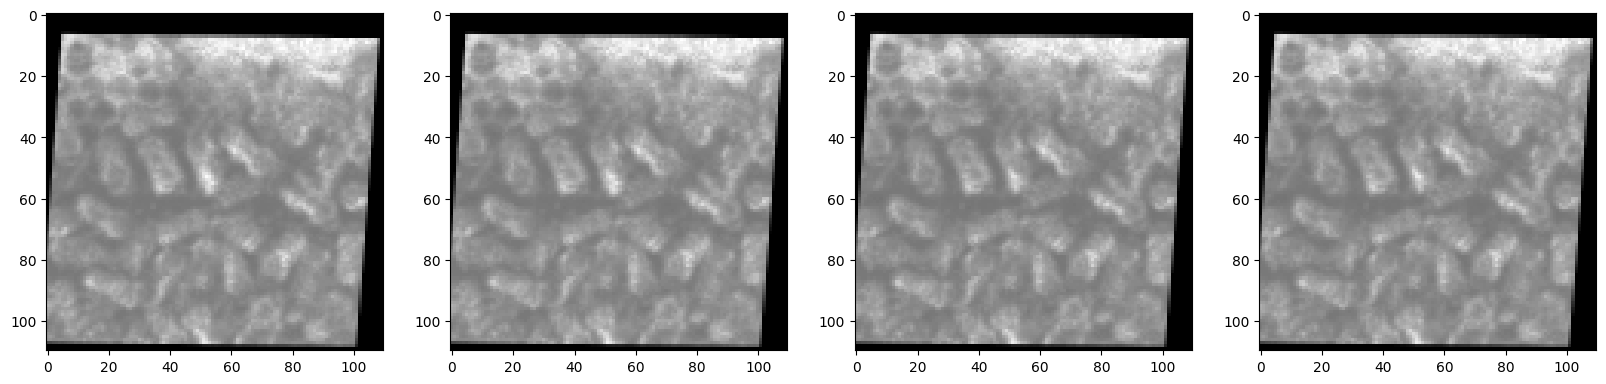

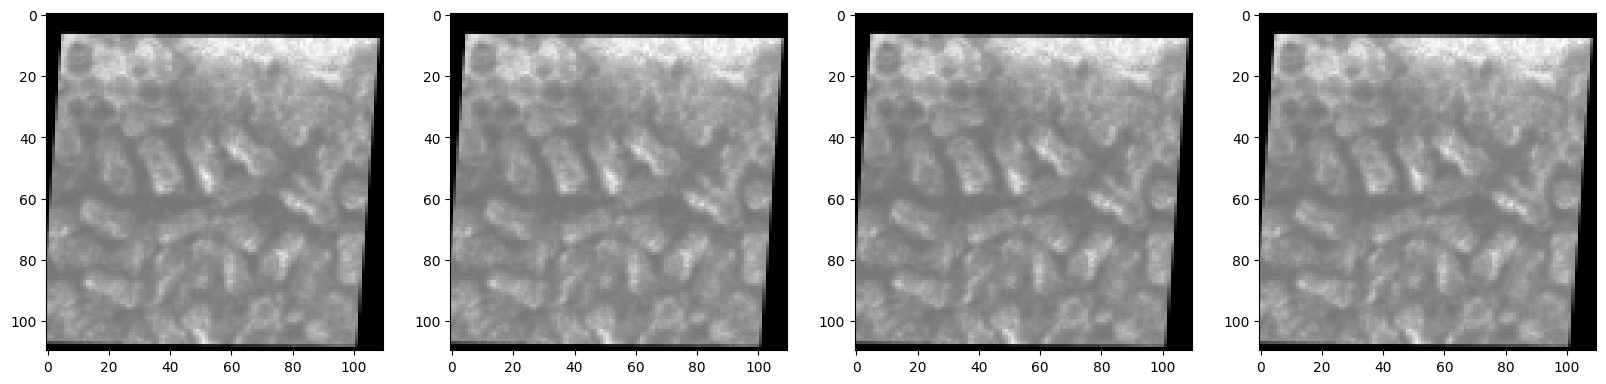

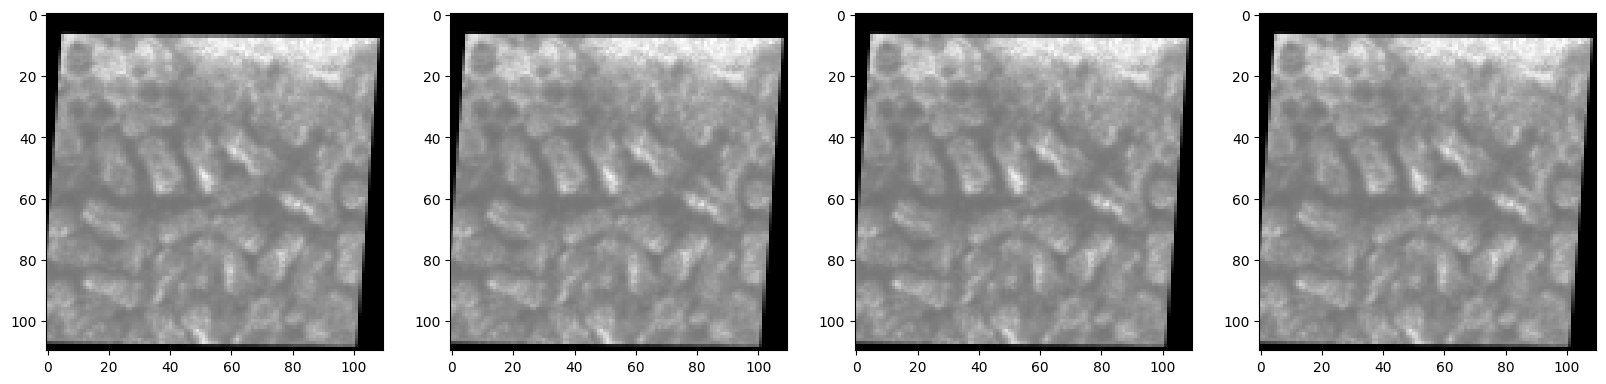

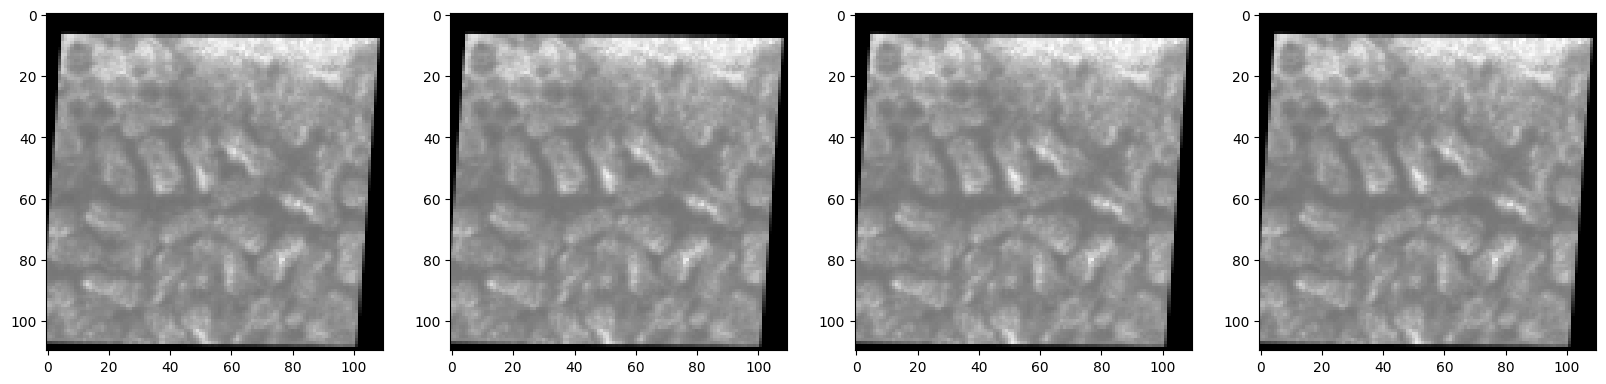

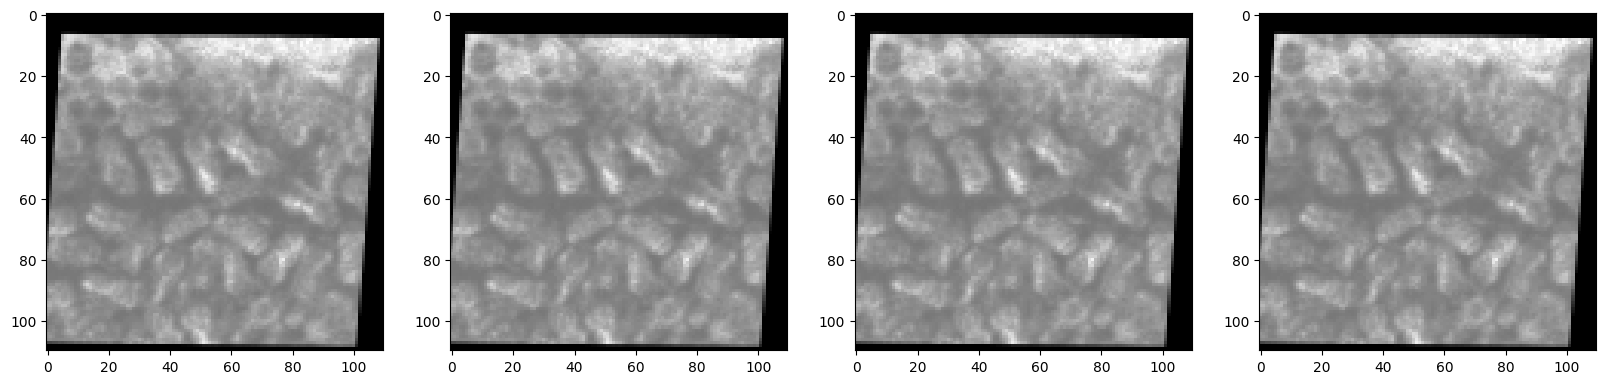

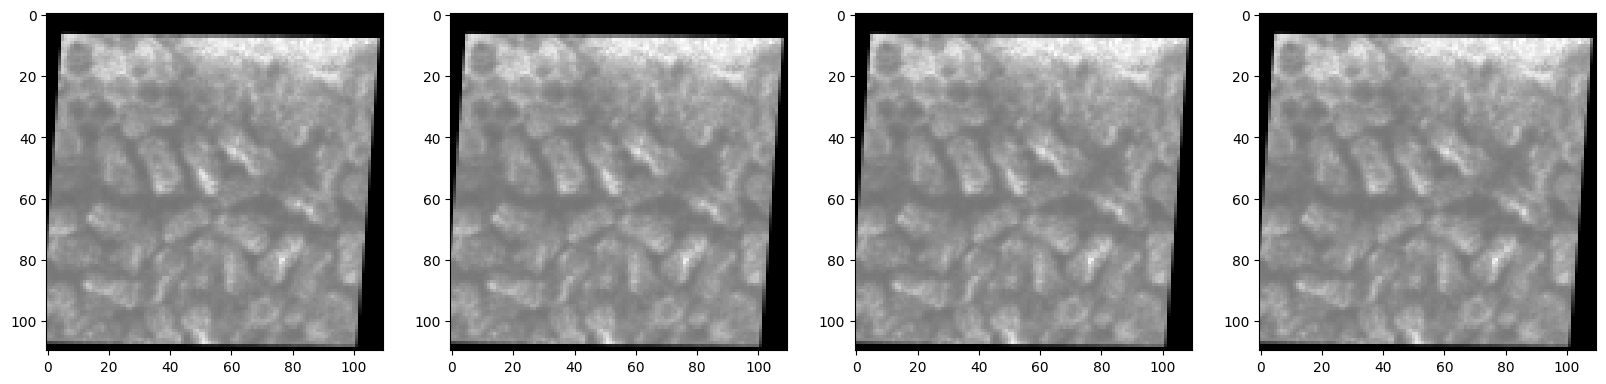

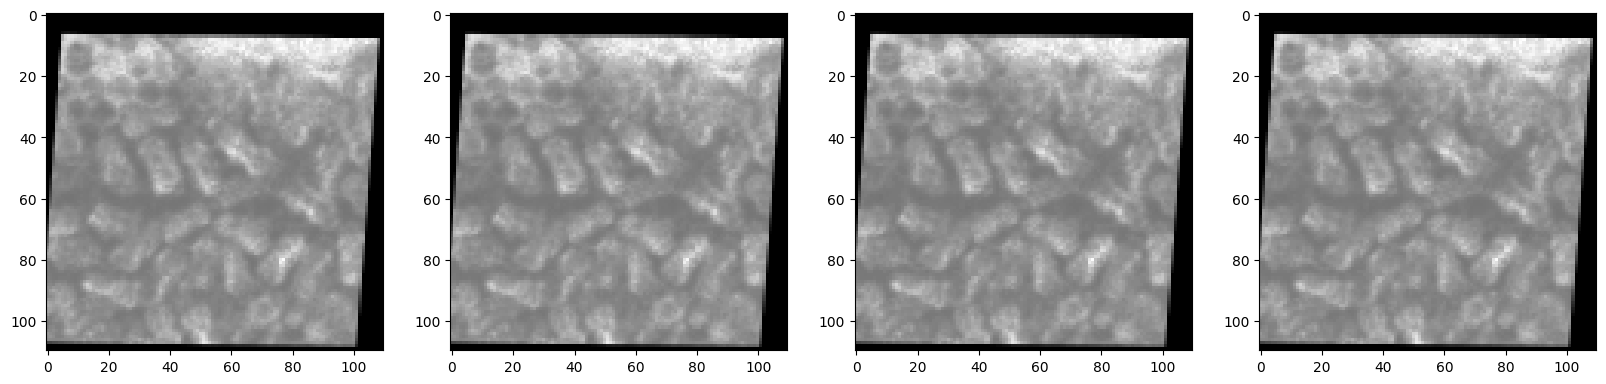

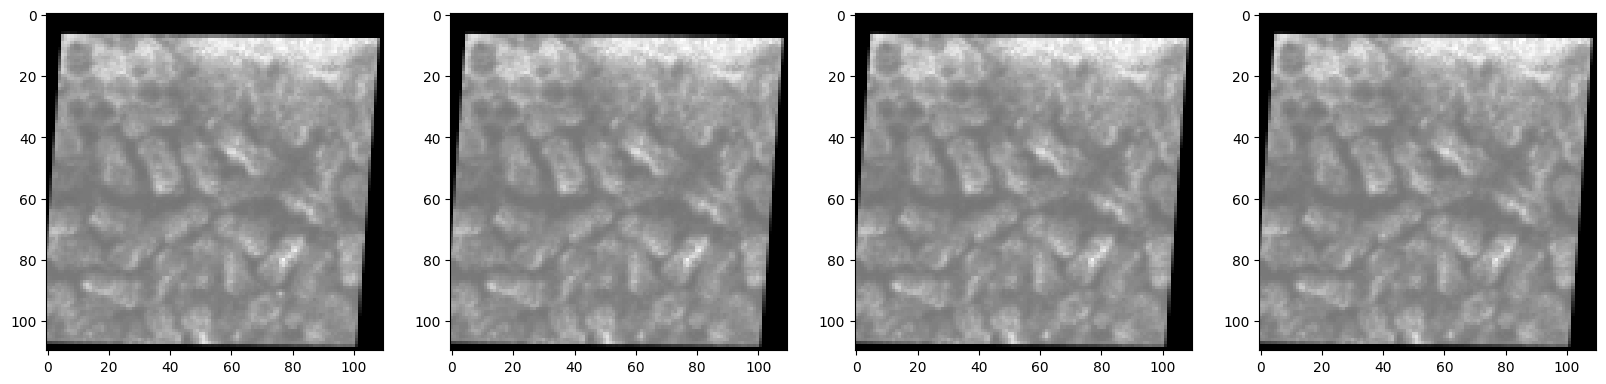

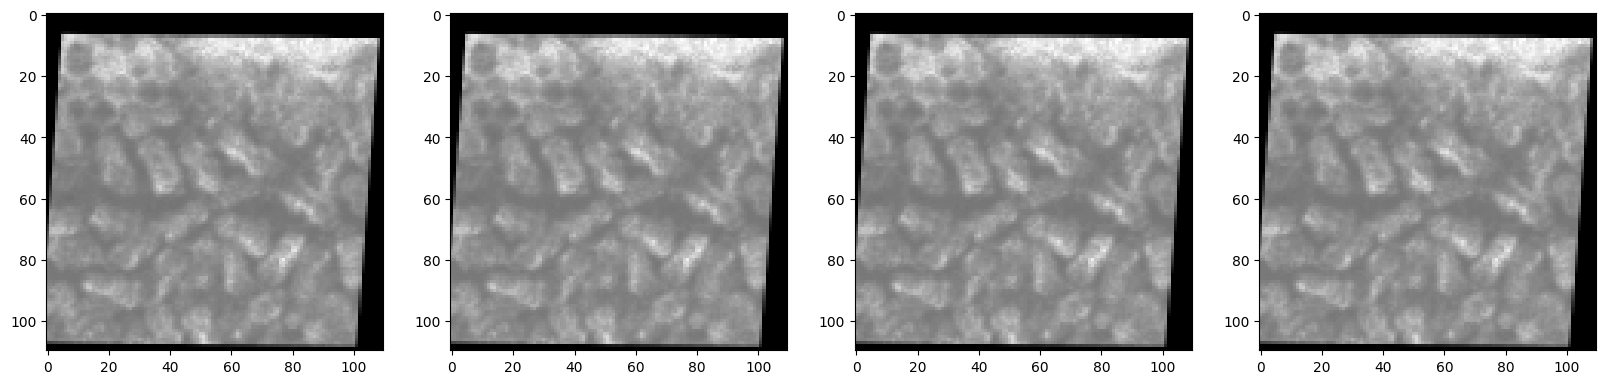

In [15]:
step = 4
for i in range(0, 92, step):
    show(video=video[i:i+step])

In [10]:
import albumentations as A
import random 

random.seed(42)

img1 = video[1]
img2 = video[2]
img3 = video[3]

imgs = [img1, img2, img3]


transform = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.Affine(
                p=1.0,
                translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)},
                shear=(-5, 5),
                scale={"x": (0.9,1.1), "y": (0.9,1.1)},
            ),
    ],

    additional_targets={'image0': 'image', 'image1': 'image'}
)


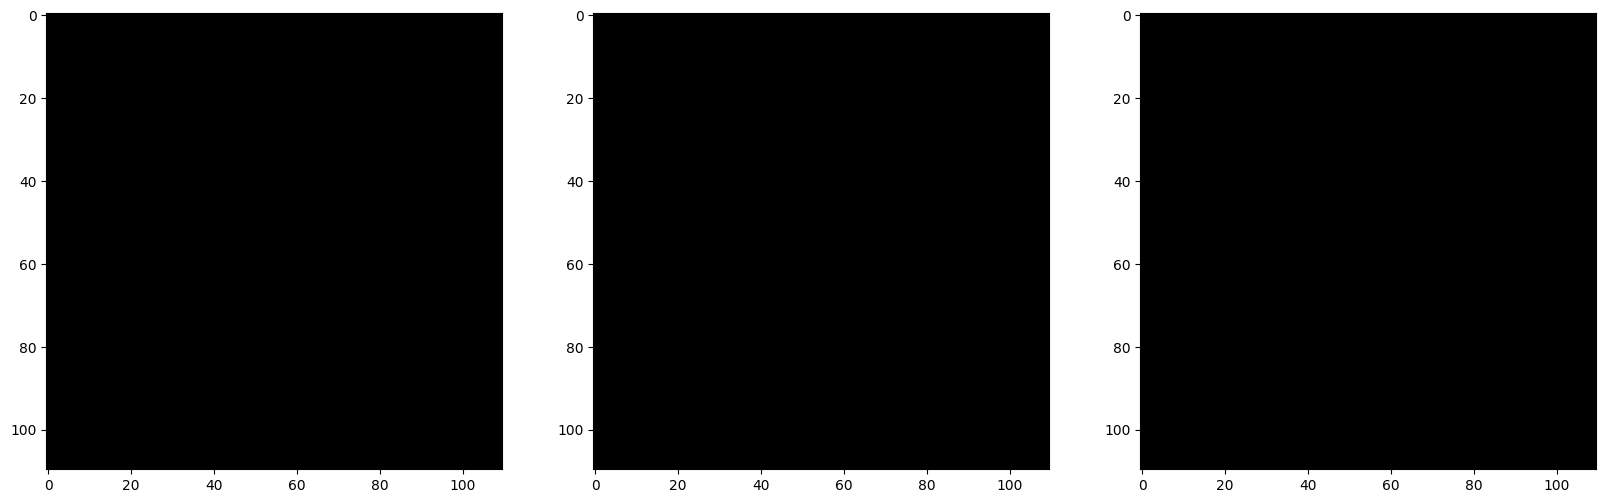

In [11]:
aug_imgs = transform(
    image=np.array(img1), 
    image0=np.array(img2), 
    image1=np.array(img3)
)
show(video=[
    aug_imgs['image'],
    aug_imgs['image0'],
    aug_imgs['image1'],
])

In [17]:
# TEST IMAGES
img1 = video[1]
img2 = video[30]
img3 = video[90]

imgs = [img1, img2, img3]


# AUGMENTER INIT
dictoINIT =  {} 
for i in range(1,len(imgs)):
    dictoINIT[f'image{i}'] = "image"


transform = A.Compose(
    [
        A.Affine(
                p=1.0,
                translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)},
                shear=(-5, 5),
                scale={"x": (0.9,1.1), "y": (0.9,1.1)},
            ),
    ],
    additional_targets=dictoINIT
)


# AUGMENTER CALL
dictoCALL = {}
for i in range(1, len(imgs)):
    dictoCALL[f'image{i}'] = np.array(imgs[i])


random.seed(42)
aug_imgs = transform(image=np.array(imgs[0]), **dictoCALL)

print(dictoINIT.keys())
print(dictoCALL.keys())
print('a')

dict_keys(['image1', 'image2'])
dict_keys(['image1', 'image2'])
a


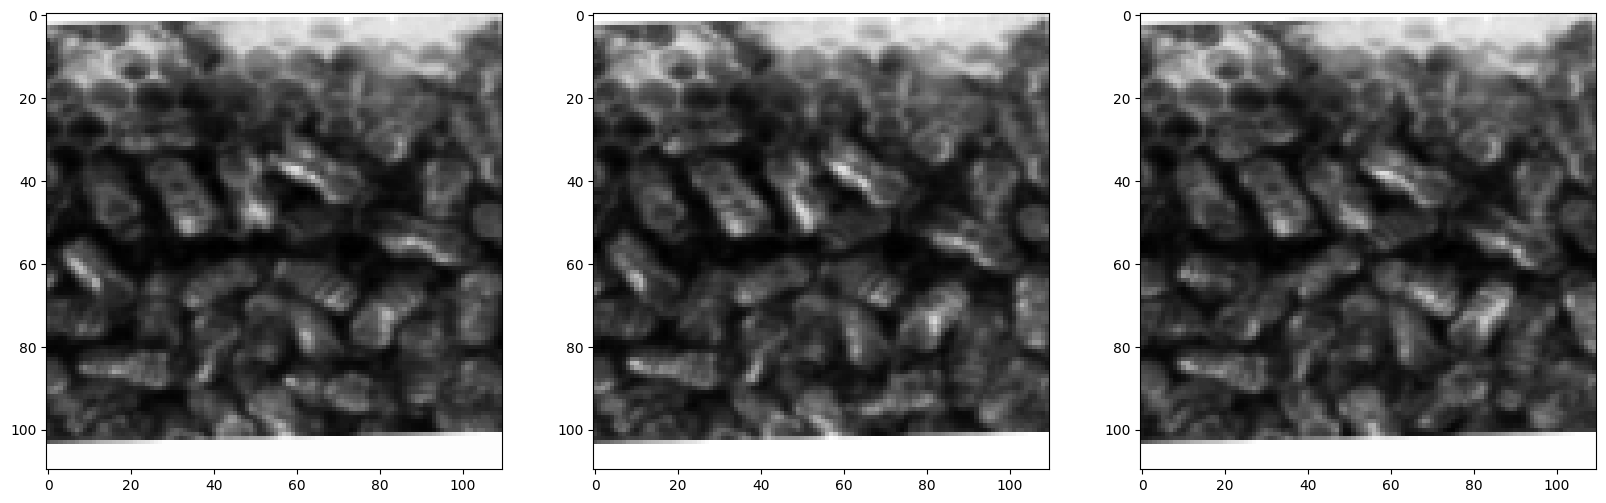

In [18]:
show(video=[
    aug_imgs['image'],
    aug_imgs['image1'],
    aug_imgs['image2'],
])

In [20]:
print(np.max(np.array(img1)),np.max(np.array(img2)),np.max(np.array(img3)))

0.027450982 -0.003921569 0.019607844
